In [1]:
from pprint import pprint

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from acquisition import get_news_articles

import re
from math import log
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

/Users/taco/Documents/Coding/Codeup/CourseWork/ds-methodologies-exercises/nlp/acquisition.py:41: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 41 of the file /Users/taco/Documents/Coding/Codeup/CourseWork/ds-methodologies-exercises/nlp/acquisition.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(response.text)
/Users/taco/Documents/Coding/Codeup/CourseWork/ds-methodologies-exercises/nlp/acquisition.py:132: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtu

### Use the acquire functions to import some data...

In [2]:
articles = get_news_articles()

In [3]:
articles

[{'title': "4th richest man Buffett says Tesla can't sell insurance, Musk responds",
  'content': 'After world\'s fourth-richest person Warren Buffett claimed carmaker Tesla cannot sell insurance, Tesla\'s CEO Elon Musk responded with a series of tweets on Sunday. In his first tweet, Musk urged users to buy Tesla Model 3, claiming it\'s cheaper than a Honda Accord. "Also 1000 times more fun!" and "That\'s a direct quote from Warren Buffett," his next tweets read.',
  'category': 'business'},
 {'title': 'Guj trader, who gifted cars to staff, to remove illegal road he built',
  'content': "Gujarat-based diamond trader Savji Dholakia, who's known for gifting cars to his employees, has said he'll remove a 'kutcha' road built by him across the dry Narmada river to reach his farmhouse. This comes after government officials visited the spot on learning about the illegal structure. Meanwhile, Dholakia said his only intention was to enable people to reach the island.",
  'category': 'business'}

### Look at the first article first...

In [4]:
tesla = articles[0]

In [5]:
tesla

{'title': "4th richest man Buffett says Tesla can't sell insurance, Musk responds",
 'content': 'After world\'s fourth-richest person Warren Buffett claimed carmaker Tesla cannot sell insurance, Tesla\'s CEO Elon Musk responded with a series of tweets on Sunday. In his first tweet, Musk urged users to buy Tesla Model 3, claiming it\'s cheaper than a Honda Accord. "Also 1000 times more fun!" and "That\'s a direct quote from Warren Buffett," his next tweets read.',
 'category': 'business'}

### Create a Bag of Words (BOW) also known as term frequency list... This is the raw count.

In [6]:
tf = pd.Series(tesla['content'].split()).value_counts()
tf

a                 3
Musk              2
tweets            2
Tesla             2
his               2
Warren            2
with              1
1000              1
on                1
cannot            1
Accord.           1
claiming          1
direct            1
first             1
fourth-richest    1
from              1
Buffett           1
Buffett,"         1
cheaper           1
Model             1
CEO               1
next              1
responded         1
read.             1
sell              1
and               1
Elon              1
tweet,            1
claimed           1
it's              1
person            1
insurance,        1
world's           1
In                1
Sunday.           1
Tesla's           1
Honda             1
series            1
"That's           1
to                1
urged             1
of                1
"Also             1
fun!"             1
users             1
quote             1
times             1
buy               1
than              1
3,                1


### This is the normalized or relative frequency, which is calculated by the number of times each word appears divided by the total number of words.

In [7]:
pd.Series(tesla['content'].split()).value_counts(normalize=True)

a                 0.050000
Musk              0.033333
tweets            0.033333
Tesla             0.033333
his               0.033333
Warren            0.033333
with              0.016667
1000              0.016667
on                0.016667
cannot            0.016667
Accord.           0.016667
claiming          0.016667
direct            0.016667
first             0.016667
fourth-richest    0.016667
from              0.016667
Buffett           0.016667
Buffett,"         0.016667
cheaper           0.016667
Model             0.016667
CEO               0.016667
next              0.016667
responded         0.016667
read.             0.016667
sell              0.016667
and               0.016667
Elon              0.016667
tweet,            0.016667
claimed           0.016667
it's              0.016667
person            0.016667
insurance,        0.016667
world's           0.016667
In                0.016667
Sunday.           0.016667
Tesla's           0.016667
Honda             0.016667
s

In [8]:
len(tesla['content'])

364

### Make a frequency table to compare these measures of the words.

In [9]:
freq_df = (pd.DataFrame({'raw_count': pd.Series(tesla['content'].split()).value_counts()})
 .assign(frequency=lambda df: df.raw_count / df.raw_count.sum())
 .assign(augmented_frequency=lambda df: df.frequency / df.frequency.max()))

In [10]:
freq_df

,raw_count,frequency,augmented_frequency
a,3,0.050000,1.000000
Musk,2,0.033333,0.666667
tweets,2,0.033333,0.666667
Tesla,2,0.033333,0.666667
his,2,0.033333,0.666667
Warren,2,0.033333,0.666667
with,1,0.016667,0.333333
1000,1,0.016667,0.333333
on,1,0.016667,0.333333
cannot,1,0.016667,0.333333


In [11]:
type(articles)

list

In [12]:
for element in articles:
    print(element['content'])

After world's fourth-richest person Warren Buffett claimed carmaker Tesla cannot sell insurance, Tesla's CEO Elon Musk responded with a series of tweets on Sunday. In his first tweet, Musk urged users to buy Tesla Model 3, claiming it's cheaper than a Honda Accord. "Also 1000 times more fun!" and "That's a direct quote from Warren Buffett," his next tweets read.
Gujarat-based diamond trader Savji Dholakia, who's known for gifting cars to his employees, has said he'll remove a 'kutcha' road built by him across the dry Narmada river to reach his farmhouse. This comes after government officials visited the spot on learning about the illegal structure. Meanwhile, Dholakia said his only intention was to enable people to reach the island.
World's fourth-richest person, Warren Buffett, has said that he will "never hesitate even for a second to fly on a Boeing 737 MAX plane" which was involved in two crashes that claimed the lives of 346 people. He was responding to a question about damage to 

In [13]:
tesla

{'title': "4th richest man Buffett says Tesla can't sell insurance, Musk responds",
 'content': 'After world\'s fourth-richest person Warren Buffett claimed carmaker Tesla cannot sell insurance, Tesla\'s CEO Elon Musk responded with a series of tweets on Sunday. In his first tweet, Musk urged users to buy Tesla Model 3, claiming it\'s cheaper than a Honda Accord. "Also 1000 times more fun!" and "That\'s a direct quote from Warren Buffett," his next tweets read.',
 'category': 'business'}

### Find the unique words only...

In [14]:
entire_text = ' '.join(list(tesla.values()))
print(entire_text)

words = re.sub(r'[^\w\s]', '', entire_text.lower()).split()

unique_words = list(set(words))
unique_words

4th richest man Buffett says Tesla can't sell insurance, Musk responds After world's fourth-richest person Warren Buffett claimed carmaker Tesla cannot sell insurance, Tesla's CEO Elon Musk responded with a series of tweets on Sunday. In his first tweet, Musk urged users to buy Tesla Model 3, claiming it's cheaper than a Honda Accord. "Also 1000 times more fun!" and "That's a direct quote from Warren Buffett," his next tweets read. business


['a',
 'model',
 'and',
 'cant',
 'warren',
 'sell',
 'responds',
 '4th',
 'responded',
 'next',
 'musk',
 'tweet',
 'its',
 'buffett',
 'cheaper',
 'his',
 'fun',
 'with',
 'from',
 'first',
 'cannot',
 'times',
 'direct',
 'claiming',
 'man',
 'business',
 'tesla',
 'says',
 'richest',
 'on',
 '1000',
 'buy',
 'of',
 'carmaker',
 'teslas',
 'honda',
 'more',
 'than',
 'in',
 '3',
 'quote',
 'users',
 'thats',
 'sunday',
 'also',
 'urged',
 'read',
 'worlds',
 'to',
 'insurance',
 'ceo',
 'series',
 'after',
 'elon',
 'tweets',
 'fourthrichest',
 'accord',
 'person',
 'claimed']

## IDF, Inverse Document Frequency


### IDF tells us how much information a word provides.

In [15]:
for word in unique_words:
    n_documents_this_word_appears_in = 0
    for doc in tesla.values():
        if word in doc.lower():
            n_documents_this_word_appears_in += 1
    document_frequency = n_documents_this_word_appears_in
    idf = log(len(tesla) / (document_frequency + .1))
    print(word, idf)

a 0.3566749439387324
model 1.0033021088637848
and 1.0033021088637848
cant 3.4011973816621555
warren 1.0033021088637848
sell 0.3566749439387324
responds 1.0033021088637848
4th 1.0033021088637848
responded 1.0033021088637848
next 1.0033021088637848
musk 0.3566749439387324
tweet 1.0033021088637848
its 3.4011973816621555
buffett 0.3566749439387324
cheaper 1.0033021088637848
his 1.0033021088637848
fun 1.0033021088637848
with 1.0033021088637848
from 1.0033021088637848
first 1.0033021088637848
cannot 1.0033021088637848
times 1.0033021088637848
direct 1.0033021088637848
claiming 1.0033021088637848
man 1.0033021088637848
business 1.0033021088637848
tesla 0.3566749439387324
says 1.0033021088637848
richest 0.3566749439387324
on 0.3566749439387324
1000 1.0033021088637848
buy 1.0033021088637848
of 1.0033021088637848
carmaker 1.0033021088637848
teslas 3.4011973816621555
honda 1.0033021088637848
more 1.0033021088637848
than 1.0033021088637848
in -0.032789822822990956
3 1.0033021088637848
quote 1.0033

In [16]:
tesla.values()

dict_values(["4th richest man Buffett says Tesla can't sell insurance, Musk responds", 'After world\'s fourth-richest person Warren Buffett claimed carmaker Tesla cannot sell insurance, Tesla\'s CEO Elon Musk responded with a series of tweets on Sunday. In his first tweet, Musk urged users to buy Tesla Model 3, claiming it\'s cheaper than a Honda Accord. "Also 1000 times more fun!" and "That\'s a direct quote from Warren Buffett," his next tweets read.', 'business'])

In [17]:
tesla

{'title': "4th richest man Buffett says Tesla can't sell insurance, Musk responds",
 'content': 'After world\'s fourth-richest person Warren Buffett claimed carmaker Tesla cannot sell insurance, Tesla\'s CEO Elon Musk responded with a series of tweets on Sunday. In his first tweet, Musk urged users to buy Tesla Model 3, claiming it\'s cheaper than a Honda Accord. "Also 1000 times more fun!" and "That\'s a direct quote from Warren Buffett," his next tweets read.',
 'category': 'business'}

In [18]:
for doc in tesla.values():
    print(doc)
    print()

4th richest man Buffett says Tesla can't sell insurance, Musk responds

After world's fourth-richest person Warren Buffett claimed carmaker Tesla cannot sell insurance, Tesla's CEO Elon Musk responded with a series of tweets on Sunday. In his first tweet, Musk urged users to buy Tesla Model 3, claiming it's cheaper than a Honda Accord. "Also 1000 times more fun!" and "That's a direct quote from Warren Buffett," his next tweets read.

business



In [19]:
# A simple way to calculate idf for demonstration. Note that this
# function relies on the globally defined documents variable.
def idf(word):
    n_occurences = sum([1 for doc in documents if word in doc])+0.01
    return len(documents) / n_occurences


In [20]:
documents = tesla.values()

In [21]:
idf('a')

1.492537313432836

## TFIDF, Term Frequency Inverse Document Frequency

## Using sklearn to create a TFIDF, which basically takes TF and IDF and multiplies them togther.

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf.fit(tesla.values())
sparse_matrix = tfidf.transform(tesla.values())
tfidf_values = sparse_matrix.todense()
sparse_matrix

<3x56 sparse matrix of type '<class 'numpy.float64'>'
	with 62 stored elements in Compressed Sparse Row format>

### Output is a sparse matrix... with this sparse matrix we can see the unique TF-IDF score for every word.

In [23]:
sparse_matrix.todense()

matrix([[0.        , 0.34359602, 0.        , 0.        , 0.        ,
         0.        , 0.26131363, 0.        , 0.        , 0.34359602,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.26131363, 0.        , 0.34359602, 0.        , 0.        ,
         0.26131363, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.34359602, 0.26131363,
         0.34359602, 0.26131363, 0.        , 0.        , 0.26131363,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.12444899, 0.        , 0.12444899, 0.12444899, 0.12444899,
         0.12444899, 0.18929333, 0.        , 0.12444899, 0.        ,
         0.12444899, 0.12444899, 0.12444899, 0.12444899, 0.12444899,
         0.1

### If we want, we can turn this sparse matrix to a dense matrix. The dense matrix has a lot more non-zero entries than zero entries. Opposite of the sparse matrix.

In [24]:
pd.DataFrame(tfidf_values, columns=tfidf.get_feature_names())

,1000,4th,accord,after,also,and,buffett,business,buy,can,...,that,times,to,tweet,tweets,urged,users,warren,with,world
0,0.000000,0.343596,0.000000,0.000000,0.000000,0.000000,0.261314,0.0,0.000000,0.343596,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.124449,0.000000,0.124449,0.124449,0.124449,0.124449,0.189293,0.0,0.124449,0.000000,...,0.124449,0.124449,0.124449,0.124449,0.248898,0.124449,0.124449,0.248898,0.124449,0.124449
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### We can extract the words using .get_feature_names and see what the scores are for the words. This usually can't be seen very well because it is a really really big matrix.

# Text Messages Spam Data

## TFIDF

### We split the data into train and test because we have a simple classification problem where we want to predict if something is spam or not spam.

In [25]:
from sklearn.model_selection import train_test_split

spam = pd.read_csv('./spam_clean.csv')
spam

X_train, X_test, y_train, y_test = train_test_split(spam.text, spam.label, stratify=spam.label, random_state=123)

### Use a logistic regression model to train on data and make predictions...

In [26]:
from sklearn.linear_model import LogisticRegression

tfidf = TfidfVectorizer()
tfidf.fit(X_train)
train_tfidf_values = tfidf.transform(X_train)

model = LogisticRegression()
model.fit(train_tfidf_values, y_train)

predictions = model.predict(train_tfidf_values)

### Look at a confusion matrix to see how the model performed. 

In [27]:
df = pd.DataFrame(dict(actual=y_train, predicted=predictions))

pd.crosstab(df.predicted, df.actual)

actual,ham,spam
predicted,,
ham,3618,110
spam,1,450


### Use a classification report to see the stats...

In [28]:
from sklearn.metrics import classification_report

print(classification_report(df.actual, df.predicted))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      3619
        spam       1.00      0.80      0.89       560

   micro avg       0.97      0.97      0.97      4179
   macro avg       0.98      0.90      0.94      4179
weighted avg       0.97      0.97      0.97      4179



### Now evaluate the model by using the test data...

In [29]:
test_tfidf_values = tfidf.transform(X_test)
test_predictions = model.predict(test_tfidf_values)

print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1206
        spam       0.98      0.85      0.91       187

   micro avg       0.98      0.98      0.98      1393
   macro avg       0.98      0.92      0.95      1393
weighted avg       0.98      0.98      0.98      1393



### Create a little function to predict whether some unknown text is spam or not spam.

In [30]:
def predict(unknown_text):
    return model.predict(tfidf.transform([unknown_text]))[0]

In [31]:
predict('free cash prize')


'spam'

In [32]:
predict('lovely cows')


'ham'

# Additional Modeling

In [33]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from nltk.corpus import stopwords

import re
from bs4 import BeautifulSoup
%matplotlib inline
import unicodedata

#### Some safety imports again

In [34]:
spam.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [35]:
spam.shape

(5572, 2)

### Some basic data preparation...

In [36]:
def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]


### Apply this clean function to the Text column...

In [37]:
spam['text'] = spam['text'].apply(clean)

In [38]:
spam.head()

,label,text
0,ham,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,"[ok, lar, joking, wif, u, oni]"
2,spam,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"[nah, dont, think, go, usf, life, around, though]"


In [39]:
' '.join(spam.text[0])

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

### Make sure the dataframe is in the right format. Change the Text column to a string. Not a list of string elements.

In [40]:
def join(list):
    return ' '.join(list)

In [41]:
for element in spam.text[1]:
    print(element)

ok
lar
joking
wif
u
oni


In [42]:
join(spam.text[1])

'ok lar joking wif u oni'

### Apply this join function to the Text column...

In [43]:
spam['text'] = spam['text'].apply(join)

In [44]:
spam.head()

,label,text
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah dont think go usf life around though


### Now we have a dataframe we can work with...

### Split Train/Test

In [45]:
X = spam.text
y = spam.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

# Naive Bayes Model

In [46]:
my_tags = ['spam', 'ham']

In [47]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

CPU times: user 7 µs, sys: 2 µs, total: 9 µs
Wall time: 18.1 µs
accuracy 0.9599282296650717
              precision    recall  f1-score   support

        spam       0.96      1.00      0.98      1453
         ham       1.00      0.69      0.82       219

   micro avg       0.96      0.96      0.96      1672
   macro avg       0.98      0.85      0.90      1672
weighted avg       0.96      0.96      0.96      1672



# Linear Support Vector Machine

In [48]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

%time

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 12.2 µs
accuracy 0.9569377990430622
              precision    recall  f1-score   support

        spam       0.95      1.00      0.98      1453
         ham       0.98      0.68      0.81       219

   micro avg       0.96      0.96      0.96      1672
   macro avg       0.97      0.84      0.89      1672
weighted avg       0.96      0.96      0.95      1672



# Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

%time

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.06 µs
accuracy 0.9796650717703349
              precision    recall  f1-score   support

        spam       0.98      1.00      0.99      1453
         ham       0.98      0.86      0.92       219

   micro avg       0.98      0.98      0.98      1672
   macro avg       0.98      0.93      0.95      1672
weighted avg       0.98      0.98      0.98      1672



# Word2vec and Logistic Regression


In [50]:
print(gensim.__version__)

3.7.3


### Use gensim to load a word2vec model pretrained on google news and perform some simple actions with the word vectors.

In [51]:
from gensim.models import Word2Vec
wv = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz", binary=True)
wv.init_sims(replace=True)

###  Normalize the word2vec vectors first, so they all have equal length. 

### Load up a Google News model. 

In [52]:
from itertools import islice
list(islice(wv.vocab, 13030, 13050))

['Memorial_Hospital',
 'Seniors',
 'memorandum',
 'elephant',
 'Trump',
 'Census',
 'pilgrims',
 'De',
 'Dogs',
 '###-####_ext',
 'chaotic',
 'forgive',
 'scholar',
 'Lottery',
 'decreasing',
 'Supervisor',
 'fundamentally',
 'Fitness',
 'abundance',
 'Hold']

### Define some functions to perform Bag of Words analysis on the word vectors. Simple stuff like word averaging, summation, and weighted addition.

In [53]:
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list ])

In [54]:
import nltk
from nltk.tokenize.toktok import ToktokTokenizer

### Tokenize the text, Train/Test split...

In [55]:
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens
    
train, test = train_test_split(spam, test_size=0.3, random_state = 42)

test_tokenized = test.apply(lambda r: w2v_tokenize_text(r['text']), axis=1).values
train_tokenized = train.apply(lambda r: w2v_tokenize_text(r['text']), axis=1).values

X_train_word_average = word_averaging_list(wv,train_tokenized)
X_test_word_average = word_averaging_list(wv,test_tokenized)

In [56]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(X_train_word_average, train['label'])
y_pred = logreg.predict(X_test_word_average)
print('accuracy %s' % accuracy_score(y_pred, test.label))
print(classification_report(test.label, y_pred,target_names=my_tags))

accuracy 0.9473684210526315
              precision    recall  f1-score   support

        spam       0.98      0.96      0.97      1453
         ham       0.77      0.85      0.81       219

   micro avg       0.95      0.95      0.95      1672
   macro avg       0.87      0.91      0.89      1672
weighted avg       0.95      0.95      0.95      1672



# BOW with Keras


In [57]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils
from keras.models import Sequential

import keras
from keras import models
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


In [58]:
print(keras.__version__)

2.2.4


In [59]:
spam.head()

,label,text
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah dont think go usf life around though


In [60]:
spam.shape

(5572, 2)

### Split Train/Test... 

### Tokenize and then turn texts to matrix.

In [72]:
train_size = int(len(spam) * .7)
train_text = spam['text'][:train_size]
train_label = spam['label'][:train_size]

test_text = spam['text'][train_size:]
test_label = spam['label'][train_size:]

max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)
tokenize.fit_on_texts(train_text) # only fit on train

x_train = tokenize.texts_to_matrix(train_text)
x_test = tokenize.texts_to_matrix(test_text)


In [73]:
print(train_size)
print(train_text)
print(train_label)
print(test_text)
print(test_label)

print(type(tokenize))

print(x_train)
print(len(x_train))
print(x_test)
print(len(x_test))

3900
0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4                nah dont think go usf life around though
5       freemsg hey darling 3 week word back id like f...
6           even brother like speak treat like aid patent
7       per request melle melle oru minnaminunginte nu...
8       winner valued network customer selected receiv...
9       mobile 11 month u r entitled update latest col...
10      im gonna home soon dont want talk stuff anymor...
11      six chance win cash 100 20000 pound txt csh11 ...
12      urgent 1 week free membership a100000 prize ja...
13      ive searching right word thank breather promis...
14                                            date sunday
15      xxxmobilemovieclub use credit click wap link n...
16                                        oh kim watching
17      e

In [74]:
encoder = LabelEncoder()
encoder.fit(train_label)
y_train = encoder.transform(train_label)
y_test = encoder.transform(test_label)

In [75]:
print(y_train)
print(len(y_train))
print(y_test)
print(len(y_test))

[0 0 1 ... 0 0 0]
3900
[0 0 0 ... 0 0 0]
1672


In [76]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [77]:
np.max(y_train)

1

In [78]:
y_train.shape

(3900,)

In [79]:
num_classes = int(np.max(y_train)) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)


In [80]:
y_train.shape

(3900, 2)

In [81]:


batch_size = 32
epochs = 2

# Build the model
model = Sequential()
# print(type(model))
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
              
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Instructions for updating:
Use tf.cast instead.


Train on 3510 samples, validate on 390 samples
Epoch 1/2
3510/3510 [==============================] - 2s 530us/step - loss: 0.2606 - acc: 0.9165 - val_loss: 0.1081 - val_acc: 0.9692
Epoch 2/2
3510/3510 [==============================] - 1s 390us/step - loss: 0.0659 - acc: 0.9812 - val_loss: 0.0831 - val_acc: 0.9795


## Achieved accuracy of 97.95% in 2 epochs

### Evaluate the accuracy of our trained model


In [82]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])


1672/1672 [==============================] - 0s 70us/step
Test score: 0.07539504077552893
Test accuracy: 0.9784688995215312


### Make predictions

In [83]:

# Here's how to generate a prediction on individual examples
text_labels = encoder.classes_ 

for i in range(10):
    prediction = model.predict(np.array([x_test[i]]))
    predicted_label = text_labels[np.argmax(prediction)]
    print(test_text.iloc[i][:50], "...")
    print('Actual label:' + test_label.iloc[i])
    print("Predicted label: " + predicted_label + "\n")

depends would like treated ...
Actual label:ham
Predicted label: ham

right brah see later ...
Actual label:ham
Predicted label: ham

waiting e car 4 mum lor u leh reach home already ...
Actual label:ham
Predicted label: ham

2004 account 07xxxxxxxxx show 786 unredeemed point ...
Actual label:spam
Predicted label: spam

want new video handset 750 anytime network min hal ...
Actual label:spam
Predicted label: spam

went fast asleep deartake care ...
Actual label:ham
Predicted label: ham

mean fat head ...
Actual label:ham
Predicted label: ham

sound like plan cardiff still still cold im sittin ...
Actual label:ham
Predicted label: ham

serious like proper tongued ...
Actual label:ham
Predicted label: ham

shes good wondering wont say hi shes smiling copin ...
Actual label:ham
Predicted label: ham



In [84]:
y_softmax = model.predict(x_test)

y_test_1d = []
y_pred_1d = []

for i in range(len(y_test)):
    probs = y_test[i]
    index_arr = np.nonzero(probs)
    one_hot_index = index_arr[0].item(0)
    y_test_1d.append(one_hot_index)

for i in range(0, len(y_softmax)):
    probs = y_softmax[i]
    predicted_index = np.argmax(probs)
    y_pred_1d.append(predicted_index)

In [85]:
# This utility function is from the sklearn docs: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

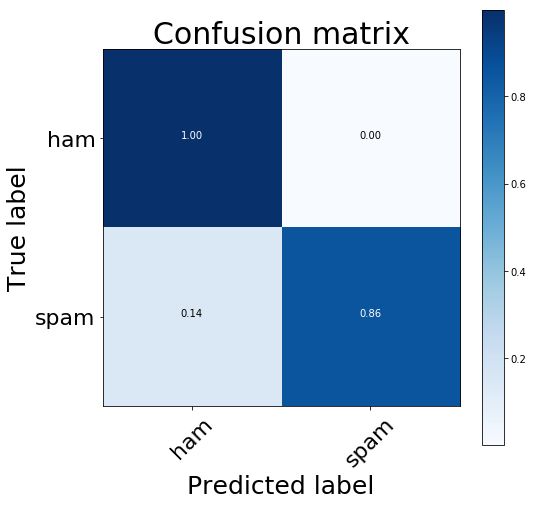

In [87]:
cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()

### References:

#### https://github.com/tensorflow/workshops/blob/master/extras/keras-bag-of-words/keras-bow-model.ipynb
#### https://towardsdatascience.com/multi-class-text-classification-model-comparison-and-selection-5eb066197568